In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [64]:
df = pd.read_csv('appendix.csv',parse_dates=True)
df_copy = df

In [65]:
df.describe()

,Year,Honor Code Certificates,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Posted in Forum,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,3.172414,0.813793,15344.334483,2549.172414,843.810345,24.916966,7.782586,31.445655,9.347517,21.210379,94.981828,44.364552,29.300000,67.010690,32.989310,72.078724
std,0.906301,0.389946,28207.578733,3095.159969,1105.594372,15.883538,6.972437,19.751102,7.517141,13.411540,157.617610,43.953709,4.047897,15.843642,15.843642,10.256434
min,1.000000,0.000000,322.000000,187.000000,0.000000,2.630000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,22.000000,25.240000,6.560000,44.950000
25%,3.000000,1.000000,3815.000000,755.250000,139.500000,14.215000,2.407500,13.400000,3.992500,10.590000,12.960000,12.242500,26.000000,54.170000,18.367500,64.515000
50%,3.000000,1.000000,7901.500000,1517.000000,395.500000,20.425000,5.950000,31.270000,7.245000,19.605000,37.710000,26.965000,29.000000,66.515000,33.485000,73.055000
75%,4.000000,1.000000,18038.250000,3383.000000,1201.750000,33.837500,10.687500,47.622500,14.107500,30.902500,97.225000,64.177500,31.000000,81.632500,45.830000,79.245000
max,4.000000,1.000000,301082.000000,25637.000000,5783.000000,83.960000,33.980000,77.090000,35.280000,52.350000,895.010000,251.820000,53.000000,93.440000,74.760000,98.110000


In [66]:
df['Launch Date'].unique()[0:3]

array(['09/05/2012', '09/26/2012', '10/09/2012'], dtype=object)

# Initial Exploratory Data Analysis

In [67]:
#Enrollment through time
def dateTimeIndex(df,col_name,frequency):
    df_copy = df
    # Prepare a format string: time_format
    time_format = '%m/%d/%Y'
    df_copy['Launch Date'] = pd.to_datetime(df_copy['Launch Date'],format=time_format)
    df_copy = df.set_index('Launch Date').groupby(pd.TimeGrouper(freq=frequency))[col_name].agg('mean').to_frame().reset_index()
    df_copy = df_copy.dropna()
    return df_copy

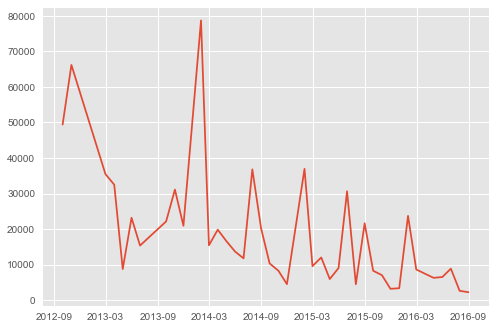

In [68]:
df_copy = dateTimeIndex(df,'Participants (Course Content Accessed)','M')
plt.plot(df_copy['Launch Date'],df_copy['Participants (Course Content Accessed)'])
plt.show()

Initial analysis shows that the average enrollment per class has been decreasing throughout the years. This could be the case because initially only a few courses were offered and a lot of students ended up taking them. The courses were probably also offered only at certain times of the year, thus explaining the two big peaks before '2014-03'. With time, different professors started teaching the same course and as such the average enrollment decreased and became more spread over the different months in a year. 

In [69]:
df_copy['Participants (Course Content Accessed)'].astype(int)
max_enrollment = df_copy['Participants (Course Content Accessed)'].max()
df_copy.loc[df_copy['Participants (Course Content Accessed)']==max_enrollment]

,Launch Date,Participants (Course Content Accessed)
16,2014-01-31,78725.5


It seems that there were 78725 average participants/enrollements measured on January 31st, 2014. It could be the case that a new interesting course was offered between the first of January and the end of January in 2014 and a lot of students wanted to take it. 

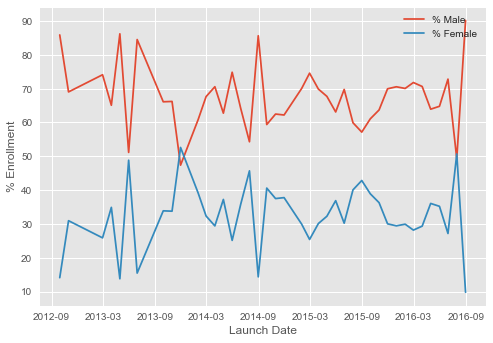

In [70]:
df_male = dateTimeIndex(df,'% Male','M')
df_female = dateTimeIndex(df,'% Female', 'M')
plt.plot(df_male['Launch Date'],df_male['% Male'])
plt.plot(df_female['Launch Date'],df_female['% Female'])
plt.legend(loc='upper right')
plt.xlabel('Launch Date')
plt.ylabel('% Enrollment')
plt.show()

The number of male students/enrollees seems to be consistently higher than the number of female enrollees. Even though it's interesting to see how many individuals enrolled the course, it would be even more interesting to see how many actually ended up getting a certification/finish it. 

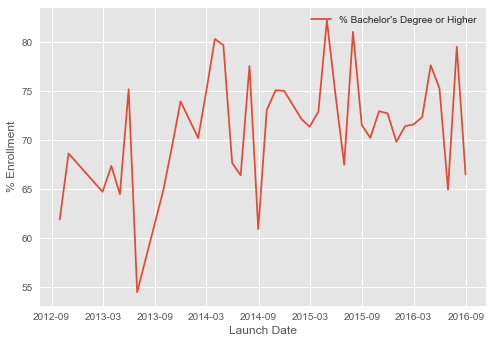

In [71]:
df_bachelors = dateTimeIndex(df,'% Bachelor\'s Degree or Higher','M')
plt.plot(df_bachelors['Launch Date'],df_bachelors['% Bachelor\'s Degree or Higher'])
plt.legend(loc='upper right')
plt.xlabel('Launch Date')
plt.ylabel('% Enrollment')
plt.show()


The majority of the enrollment seems to be from individuals who have Bachelor's degree or higher. This makes total sense because the courses offered are pretty complicated and would require somebody with higher education to be able to tackle the course content. 

In [72]:
df['Course Subject'].unique()

array(['Science, Technology, Engineering, and Mathematics',
       'Computer Science', 'Government, Health, and Social Science',
       'Humanities, History, Design, Religion, and Education'], dtype=object)

# Statistical Inference

<b>Hypotheses I want to test:<br><br></b>
><li>The % of Male enrollments higher than female enrollments in STEM subjects</li><br>
><li>The % of certified people is higher in non-STEM subjects, primarily because STEM is becoming very popular and there are many STEM courses/resources online that help individuals learn and get a certificate of learning. Thus, one probably enrolled just to get a couple of pieces of content that they wanted help with, as opposed to coming in with an intention to complete and get a certification. On the other hand, people who actually enroll in non-STEM subjects likely to do more intentionally and since there aren't as many non-STEM online courses/resources available, they are more likely to finish it and get certified.</li>

<b>First Hypothesis:</b>
><b>H0:</b> No significant difference between %male and %female enrolled in STEM subjects.<br>
<b>Ha:</b> %Male enrollments higher than female enrollments in STEM subjects. 

In [73]:
arr= ['Science, Technology, Engineering, and Mathematics','Computer Science']
df_stem = df.loc[df['Course Subject'].isin(arr)]
df_stem = df_stem[['Course Subject','% Male', '% Female']]
    
def stem_test(df,replace_col=False):    
    df_copy = df
    if (replace_col):
        df_concat = pd.concat([df_stem['% Female'],df_stem['% Male']], ignore_index=True)
        df_permute = np.random.permutation(df_concat)
        df_copy['% Male'] = df_permute[:len(df_stem['% Male'])]
        df_copy['% Female'] = df_permute[len(df_stem['% Male']):]
         
    df_copy = df_copy.groupby('Course Subject')['% Male','% Female'].agg('mean')
    df_copy = df_copy.reset_index()
    
    #Difference between male and female enrollment percentage
    diff_compSci = df_copy.iloc[0]['% Male'] - df_copy.iloc[0]['% Female']
    diff_sciMath = df_copy.iloc[1]['% Male'] - df_copy.iloc[1]['% Female']
    avg_diff = (diff_compSci + diff_sciMath) / 2
    return df_copy,avg_diff

df_stemActual,diff_val = stem_test(df_stem)
df_stemActual

,Course Subject,% Male,% Female
0,Computer Science,82.452000,17.548000
1,"Science, Technology, Engineering, and Mathematics",78.406593,21.593407


In [74]:
#Actual Difference between enrollments in stem subjects between the two genders
print ("Actual Difference: ", diff_val)

Actual Difference:  60.8585934066


In [75]:
#Permutation test to test significance:
perm_arr = []

for i in range(1000):
    df_permTest, diff_permTest = stem_test(df_stem,replace_col=True)
    perm_arr.append(diff_permTest) 

p_val = np.sum(perm_arr>=diff_val)/len(perm_arr)
print ("P-Value: ", p_val)

P-Value:  0.0


Since the p-value is so low (i.e. 0.0), we can reject the null hypothesis. It's not by chance that the difference is so large between male and female enrollments in STEM subjects. <b>Thus, there is a significant difference between male and female enrollments in STEM subjects.</b> There was no need to do a hypothesis test because the effect size was too high but it is good practice to check. 

<b>Second Hypothesis:</b>
><b>H0:</b> No difference in the certified percentage of people in STEM and non-STEM subjects<br>
<b>Ha:</b> The % of certified people higher in STEM subjects than non-STEM subjects. 

In [76]:
df_copy = df[['Course Subject','Certified','Participants (Course Content Accessed)']]
df_copy['% Certified'] = (df_copy['Certified']/df_copy['Participants (Course Content Accessed)'])*100
df_copy.head()

/Users/atuladhikari/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Course Subject,Certified,Participants (Course Content Accessed),% Certified
0,"Science, Technology, Engineering, and Mathematics",3003,36105,8.317408
1,Computer Science,5783,62709,9.221962
2,"Science, Technology, Engineering, and Mathematics",2082,16663,12.494749
3,Computer Science,1439,129400,1.112056
4,"Government, Health, and Social Science",5058,52521,9.630434


In [77]:
df_copy2 = df_copy[['Course Subject','% Certified']]
df_permut = df_copy2
df_copy2 = df_copy2.pivot_table(index='Course Subject',aggfunc='mean').reset_index()
df_copy2

,Course Subject,% Certified
0,Computer Science,5.199433
1,"Government, Health, and Social Science",8.340819
2,"Humanities, History, Design, Religion, and Edu...",11.705439
3,"Science, Technology, Engineering, and Mathematics",4.112380


We can see from the findings above that the mean number of individuals certified in STEM subjects is lower than mean number of individuals certified in non-STEM subjects. Is this result significant? Let's find out!

In [78]:
#Actual difference: 
actual_diff = ((df_copy2.iloc[1][1]+df_copy2.iloc[2][1])/2)-((df_copy2.iloc[0][1]+df_copy2.iloc[3][1])/2)
print ("Actual Difference: ",actual_diff)

Actual Difference:  5.36722258264


In [79]:
def certified_test(df,size=1000):
    perm_arr=[]
    for i in range(size):
        df['% Certified'] = np.random.permutation(df['% Certified'])
        df = df.pivot_table(index='Course Subject',aggfunc='mean').reset_index()
        permut_diff = ((df.iloc[1][1]+df.iloc[2][1])/2)-((df.iloc[0][1]+df.iloc[3][1])/2)
        perm_arr.append(permut_diff)
    return perm_arr

In [80]:
perm_arr = certified_test(df_permut)
p_value = np.sum(perm_arr>=actual_diff)/len(perm_arr)
print ("P-value is: ",p_value)

/Users/atuladhikari/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


P-value is:  0.0


Since the P-value is so low, we can reject the null hypothesis that there is no difference between the percentage of people certified in STEM and non-STEM subjects. <b>Thus, the % of people certified is higher in non-STEM subjects than in STEM subjects. </b>

# Linear Regression

One of the metrics that most edtech companies care about/should care about is student retention. If a particular course has high retention, it means that students are getting value out of it and in such a case, it would be easier to justify a monetary price to such courses. <br>
For this dataset, to calculate students retained in a course, <b>I have used the number of individuals that accessed >50% of course materials as students retained.</b> Not everybody enrolls in an online course with the goal to finish it. The fact that somebody accessed more than 50% of the content does indicate that the person got value out of the course and as such I included them in my retention model. 

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 23 columns):
Institution                                     290 non-null object
Course Number                                   290 non-null object
Launch Date                                     290 non-null datetime64[ns]
Course Title                                    290 non-null object
Instructors                                     289 non-null object
Course Subject                                  290 non-null object
Year                                            290 non-null int64
Honor Code Certificates                         290 non-null int64
Participants (Course Content Accessed)          290 non-null int64
Audited (> 50% Course Content Accessed)         290 non-null int64
Certified                                       290 non-null int64
% Audited                                       290 non-null float64
% Certified                                     290 non-null float64
% Cert

In [82]:
new_df = df[['Course Subject','Median Age','% Played Video','% Posted in Forum','Median Hours for Certification']]

In [83]:
new_df['Retention'] = (df['Audited (> 50% Course Content Accessed)']/df['Participants (Course Content Accessed)'])*100
new_df['% Played Video']=new_df['% Played Video'].replace(r'\---',np.nan, regex=True)
new_df['% Played Video'] = new_df['% Played Video'].astype(float).fillna(0.0)
new_df.head()

/Users/atuladhikari/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/atuladhikari/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/atuladhikari/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,Course Subject,Median Age,% Played Video,% Posted in Forum,Median Hours for Certification,Retention
0,"Science, Technology, Engineering, and Mathematics",26.0,83.20,8.17,64.45,15.042238
1,Computer Science,28.0,89.14,14.38,78.53,14.270679
2,"Science, Technology, Engineering, and Mathematics",27.0,87.49,14.42,61.28,17.133769
3,Computer Science,28.0,0.00,0.00,0.00,9.959815
4,"Government, Health, and Social Science",32.0,77.45,15.98,76.10,20.428019


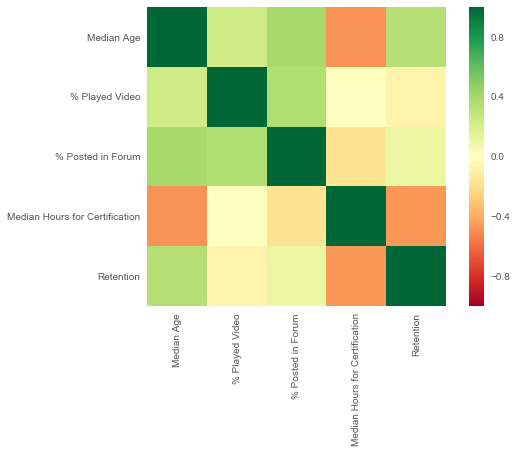

In [84]:
sns.heatmap(new_df.corr(), square=True, cmap='RdYlGn')
plt.show()

The above plot is helpful because it lets us see which and how strongly the variables are correlated with our desired dependent variable 'Retention'. It also shows how other variables are correlated with each other. It's an indication that if a variable like 'Median Age' is correlated with 'Retention' and another variable like '% Played Video' is strongly correlated with 'Median Age', we need to include it in our model. <br>However, we should take the findings from above with a grain of salt. It is necessary to check how the data points are distributed and if the best fit lines for 'correlated' variables make sense and are statistically significant. 

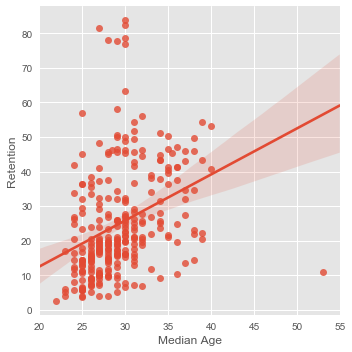

In [85]:
sns.lmplot(x='Median Age', y='Retention', data=new_df)
plt.show()

The plot above shows that Retention and Median Age have a linearly related and the slope is pretty steep. However, upon closer inspection we see that there isn't really an increasing trend because the points are spread out. It could seem increasing because there aren't many samples where the median age is greater than 35. 

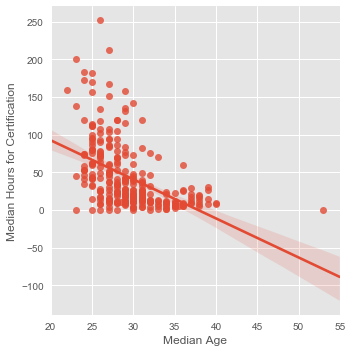

In [86]:
sns.lmplot(x='Median Age', y='Median Hours for Certification', data=new_df)
plt.show()

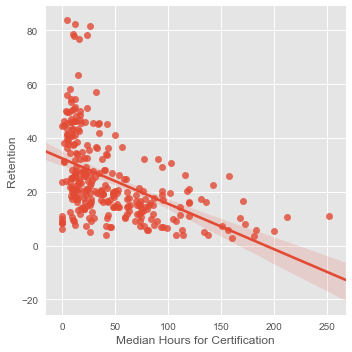

In [87]:
sns.lmplot(x='Median Hours for Certification', y='Retention', data=new_df)
plt.show()

The figure above shows that the 'Retention' is slightly correlated with the 'Median Hours of Certification'. The correlation doesn't exist when median hours < 25 but there does seem to some correlation when median hours > 25. However, this could be because there aren't enough samples where the median hours of certification > 100. Let's test the statistical signicance!

In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats  as stats

In [89]:
#Correlation between retention and median hours for certification
stats.pearsonr(new_df['Retention'], new_df['Median Hours for Certification'])

(-0.46695621181612068, 4.1238330089116869e-17)

In [90]:
#Correlation between retention and median age
stats.pearsonr(new_df['Retention'], new_df['Median Age'])

(0.33994226402309624, 2.8174874257147837e-09)

In [91]:
#Correlation between retention and %posted in forum
stats.pearsonr(new_df['Retention'], new_df['% Posted in Forum'])

(0.10299682338533946, 0.07993606027280542)

In [92]:
#Correlation between retention and %played video
stats.pearsonr(new_df['Retention'], new_df['% Played Video'])

(-0.081655698661804776, 0.16548514788911997)

From the calculations of the pearson correlation coefficients above, we can see that the correlation coefficient is <b>statistically significant for 'Median Hours for Certification' and 'Median Age'</b>. The coefficients themselves aren't that high, with one being positive and the other being negative. Even though the coefficients are statistically significant, the fact that the points themselves were spread out in the plots above indicate that the <b>MSE is very high.</b>

In [93]:
#Linear regression with two independent variables: 'Median Hours for Certification' and 'Median Age'
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(new_df[['Median Hours for Certification','Median Age']], new_df['Retention'])
print ("Regression Coefficients: ",lm.coef_)

Regression Coefficients:  [-0.1424857   0.59368262]


In [94]:
#Mean Squared Error
mse = np.mean((new_df['Retention'] - lm.predict(new_df[['Median Hours for Certification','Median Age']])) ** 2)
print ("Mean Squared Error: ", mse)

Mean Squared Error:  191.83144778056106


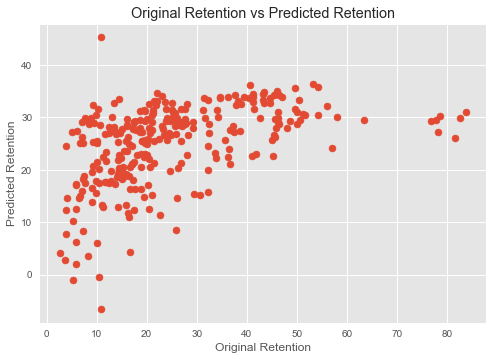

In [95]:
plt.scatter(new_df['Retention'],lm.predict(new_df[['Median Hours for Certification','Median Age']]))
plt.title("Original Retention vs Predicted Retention")
plt.xlabel("Original Retention")
plt.ylabel("Predicted Retention")
plt.show()

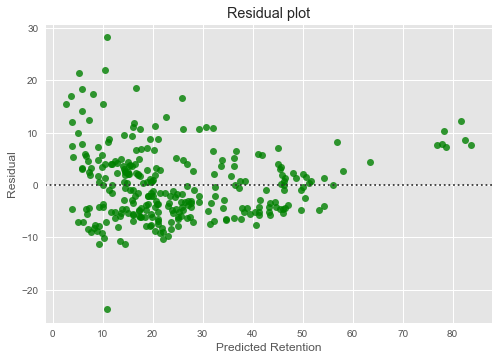

In [96]:
sns.residplot(y=(new_df['Retention']-lm.predict(new_df[['Median Hours for Certification','Median Age']])), x='Retention', data=new_df, color='green')
plt.xlabel('Predicted Retention')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

The residual plot above shows that the majority of the residual points are not that far from the line and there is no particular shape to the scatter.  

# Cross Validation, Training and Lasso

<b> Finding the mean squared error using 5-fold cross validation:</b>

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [115]:
reg_obj = LinearRegression()

#5 fold cross validation
cv_scores = cross_val_score(reg_obj,new_df[['Median Hours for Certification','Median Age']],new_df['Retention'],cv=10,scoring='neg_mean_squared_error')

print(cv_scores)

print("Average 5-Fold CV Score: {}".format(-np.mean(cv_scores)))


[-142.82366173 -192.75540456  -90.01643013 -127.25340316 -566.63459901
 -127.73153243 -154.73045293 -220.51567184 -181.55001899 -231.70480034]
Average 5-Fold CV Score: 203.57159751010676


The mean squared error using five fold cross validation isn't that different from the result we got previously, which was ~192. The mean squared error is very high, which indicates that the linear regression model doesn't perform too well. 

<b> Training the model and checking how well it generalizes: </b>

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [168]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['Median Hours for Certification','Median Age']],new_df['Retention'], test_size = 0.3, random_state=42)

reg_obj = LinearRegression()
reg_obj.fit(X_train, y_train)
print ("Regression Coefficients: ",reg_obj.coef_)

# Predict on the test data:
y_pred = reg_obj.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print ("Mean Squared Error: ",mse)
print ("R-squared: ", reg_obj.score(X_test,y_test))

Regression Coefficients:  [-0.14208455  0.44970345]
Mean Squared Error:  138.184028126
R-squared:  0.292952529713


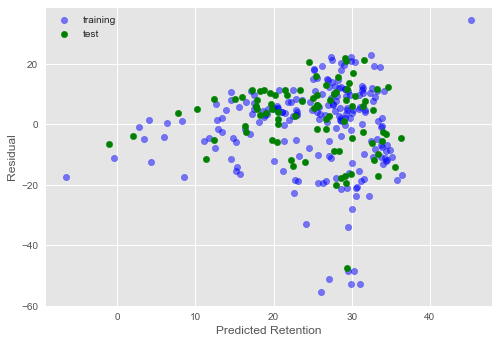

In [119]:
plt.scatter(lm.predict(X_train[['Median Hours for Certification','Median Age']]), lm.predict(X_train[['Median Hours for Certification','Median Age']]) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test[['Median Hours for Certification','Median Age']]), lm.predict(X_test[['Median Hours for Certification','Median Age']]) - y_test, c='g', s=40)
plt.xlabel('Predicted Retention')
plt.ylabel('Residual')
labels=['training','test']
plt.legend(labels,loc='upper left')
plt.show()

We can see from the above plot that the linear regression model generalizes pretty well to the test data. MSE is also lower than the one we got from cross validation so we can state with some certainty that a linear regression model with variables 'Median Hours for Certification' and 'Median Age' approximates the retention to some extent. However, the R-squared is low (i.e. only ~0.3) which means that only 30% of the variation in Retention can be approximated by the variation in our X-variables 'Median Age' and 'Median Hours for Certification'. Note, <b>the graph above mainly tells us that the model approximates the training data pretty well when run using our test data. It doesn't tell us that it approximates the retention well.</b>

<b> Using Pipelines and Normalizing Variables: </b>

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

<b> Pipeline with normalization and Lasso estimator: </b>

In [177]:
# Setup the pipeline
steps = [('scaler',StandardScaler()),
        ('lasso', Lasso())]

#Instantiate the pipeline
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(new_df[['Median Hours for Certification','Median Age']],new_df['Retention'], test_size = 0.3, random_state=42)

fitted_pipeline = pipeline.fit(X_train,y_train)

#Predict the output
y_pred = fitted_pipeline.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred)
print ("Mean Squared Error Lasso: ",mse_lasso)


Mean Squared Error Lasso:  143.565140329


The above result shows that Lasso does not perform better than the normal regression.

<b>Using Lasso regularization to choose the coefficients: </b>

[-0.01336177  0.         -0.          0.        ]


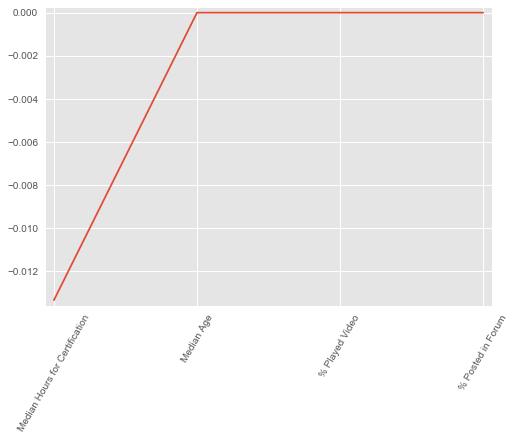

In [127]:
from sklearn.linear_model import Lasso


df_columns = ['Median Hours for Certification','Median Age','% Played Video', '% Posted in Forum']
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(new_df[['Median Hours for Certification','Median Age','% Played Video', '% Posted in Forum']],new_df['Retention'])


# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns, rotation=60)
plt.margins(0.02)
plt.show()


The Lasso output shows that the 'Median Hours for Certification' is the most important coefficient. However, <b>Lasso is most useful when there are several more features to choose from and I wanted to run this model mainly out of curiosity</b>. I will still be using 'Median Age' and 'Median Hours for Certification' as my variables because of my prior analysis that showed that the correlation coefficient for these two variables are statistically significant. Furthermore, I ran a regression with only 'Median Hours for Certification' and the MSE was higher and R^2 was lower than when both variables included. 

According to a study, lasso tends to select only one variable among a group of predictors with high pairwise correlations. Since Median Age and Median Hours for Certification are slightly correlated according to the heatmap, it could've removed one of them. 

<b>Using Pipeline with ElasticNet regularization for hyperparameter tuning: </b>

In [174]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [179]:
# Setup the pipeline
steps = [('scaler',StandardScaler()),
        ('elasticnet', ElasticNet())]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'elasticnet__l1_ratio': l1_space,
             'elasticnet__alpha':l1_space}

X_train, X_test, y_train, y_test = train_test_split(new_df[['Median Hours for Certification','Median Age']],new_df['Retention'], test_size = 0.3, random_state=42)


#Gridsearch object to select hyperparameters
grid_cv = GridSearchCV(pipeline, param_grid, cv=4)

grid_cv.fit(X_train, y_train)

y_pred = grid_cv.predict(X_test)

mse_elasticNet = mean_squared_error(y_test, y_pred)
print ("Mean Squared Error ElasticNet: ",mse_elasticNet)

print ("ElasticNet best parameters: ", grid_cv.best_params_)

print ("R-squared: ", grid_cv.score(X_test,y_test))


Mean Squared Error ElasticNet:  140.413714905
ElasticNet best parameters:  {'elasticnet__alpha': 0.17241379310344829, 'elasticnet__l1_ratio': 0.0}
R-squared:  0.281543871145


The Elastic Net regressor seems to perform better than the Lasso regressor. One interesting thing to note is that the l1_ratio parameter is 0, which means that the penalty is an L2 penalty and a Ridge regression is being performed. Thus, we would've been better off using a Ridge regressor instead of LASSO.

# Final Thoughts

The main purpose of this exercise was to get a better sense of using linear regression models in machine learning and learning best practices in parameter tuning. Through various types of analysis, we found some interesting correlations and findings with statistical significance. We also came up with a metric of interest, i.e. 'Retention' and analyzed how different features impact retention. We found out that 'Median Age' of an individual and 'Median Hours for Certification' have an impact on 'Retention'. However, we also found out that these two features alone cannot explain the variation in retention, as indicated by the high MSE and low R-square. Despite the limitations of the model, there are still a couple of insights/recommendations I have for companies that develop online education content/courses.

<b> A couple of recommendations/insights to edtech providers: </b>

1. People drop out of courses if the time to get certified is very high. Of course, this only applies to people who came in with an intention to get certified. I think it is a good idea to <b> break the course into different sub-courses and have mini-certifications for each </b> that an individual can directly share it on LinkedIn/Indeed etc. I particulary like how DataCamp does this. After every 6-10 hour course, you get a mini-certficate that you can share and download. 

2. The retention rate is higher amongst individuals that are older than those that are younger. My thinking, based on experience, is that <b>students who are in school and are taking online courses aren't doing it for the certification</b>. They are doing it just to get access to a couple of course materials to help them at school. Thus, they drop out after a couple of weeks or so. <b> Individuals that are older (28+) are probably taking online courses to get a certification that could help them with a career switch/promotion. <br></b>

Thus, it is essential to understand people's intentions/motivations when they first enroll and tailor the product/course to the particular customer segments. For instance, older individuals looking for a career switch might appreciate a section on the web page with a list of related jobs or <b>lectures on how to apply for jobs that are related to the course they are taking</b>. Further monetization opportunities might arise from that as well. 